# Loan Lending Approval Analysis

## Business Process and Brief of Company A:
- Company: A
- Product: Credits/Lending individuals in Kenya
- Process: Customer applies for a loan by entering their demographic information i.e. annual income, Age, number of years of work experience, marital status, house ownership, vehicle ownership, occupation, number of years in current employment, and number of years of stay in current residence then the company checks eligibility and provides the loan.
- Problem: Company A will want to build an automated system that fast track the process of loan approval, such that they are able to know the applicant segments/groups that are eligible for the loan with low risk of default in-order to target them.

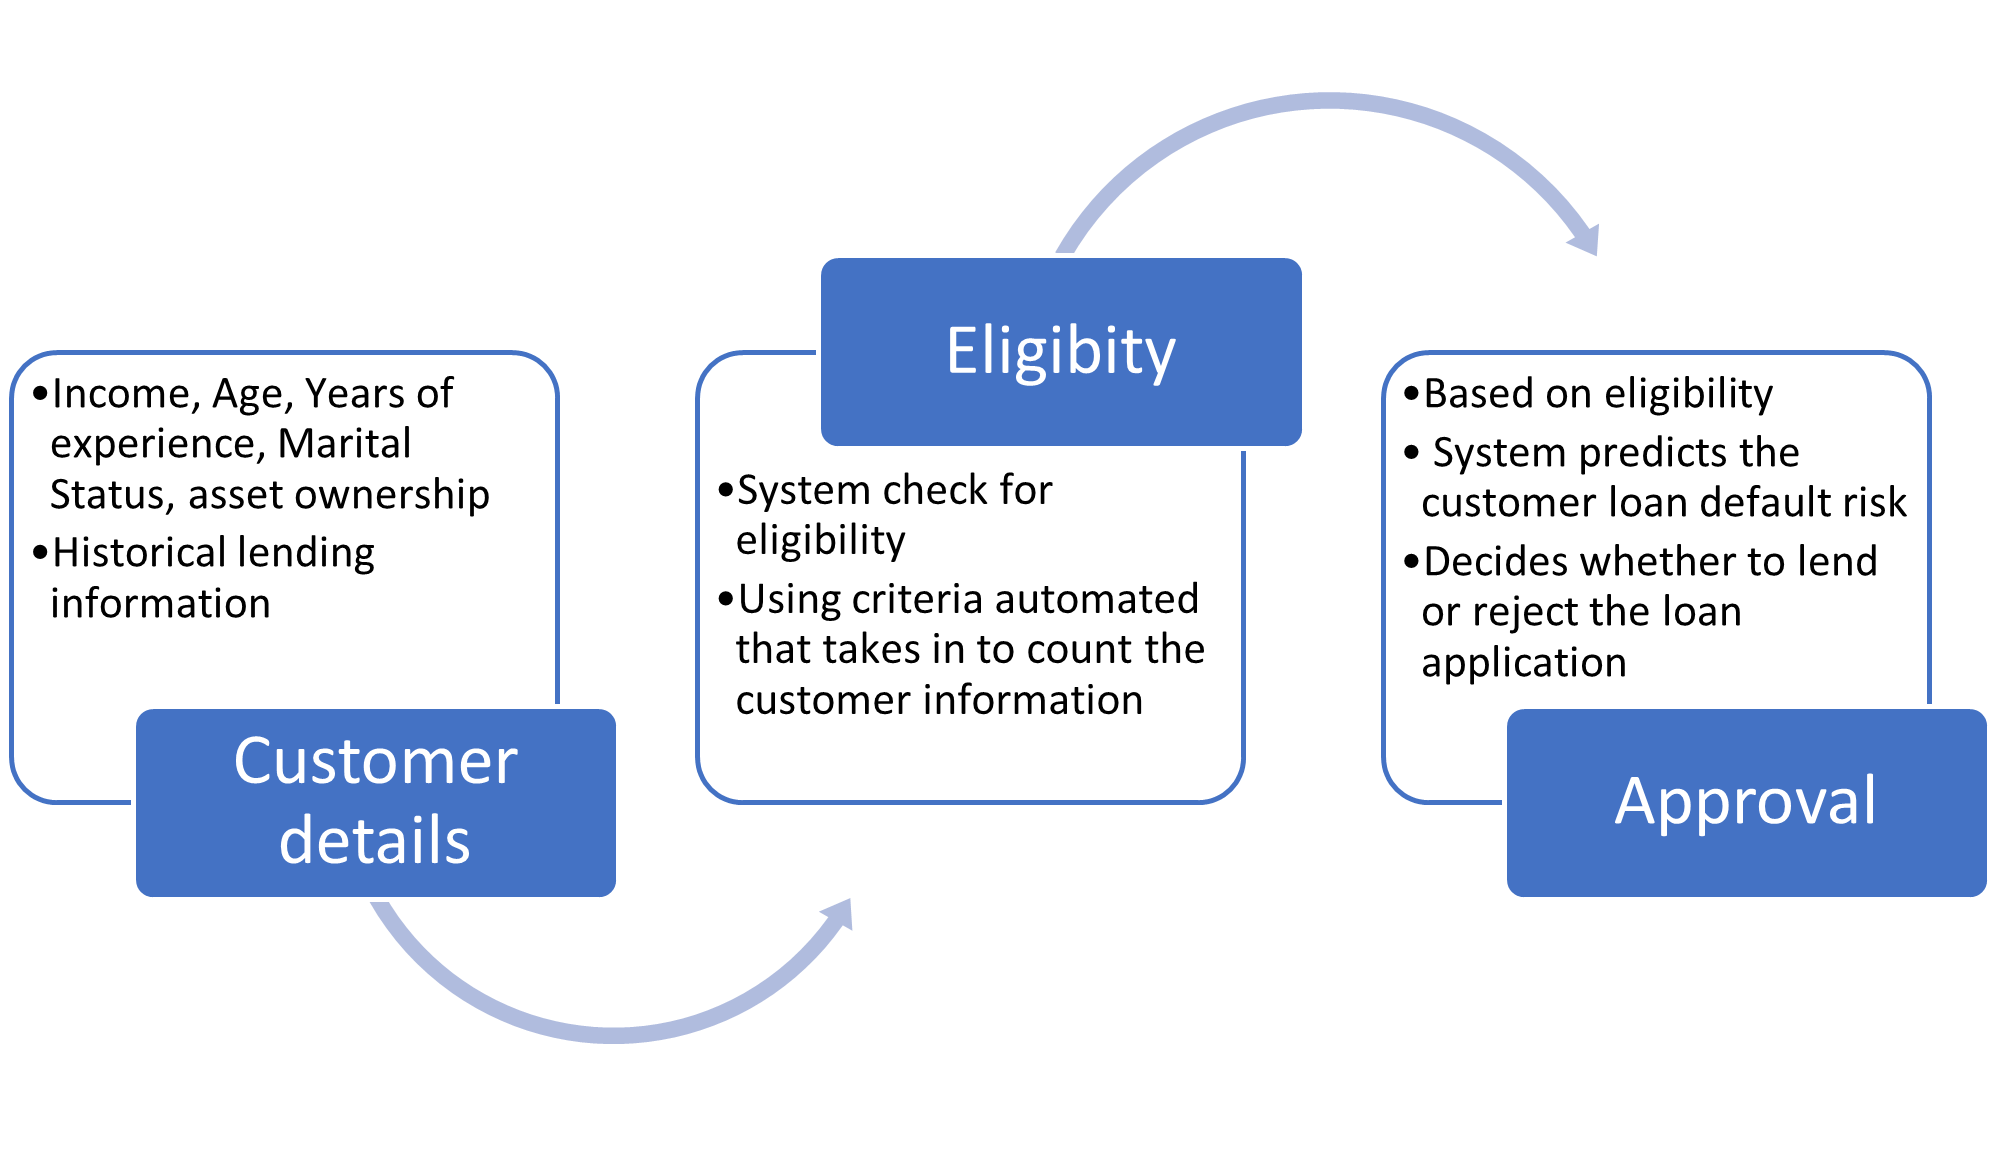

## Business Objective
- To understand how various applicants demographics affect individual risk of default (Loan default risk)
    - To determine the key features that impacts applicant's rate of loan default

## Hypotheis:
- To understand all the possibilities that can affect individual ability to default or pay loan, below are some of hypothesis we will be investigate.
    1. Annual income: Applicants with a higher annual income are less likely to default on the loan.
    2. Age: Older applicants are less likely to default on the loan
    3. Work experience: The more the number of years of experience the less likely to default on the loan
    4. Marital status: Married applicants are less likely to default on the loan
    5. House/Vehicle ownership: Applicants who own either vehicle/house are less likely to default on the loan
    6. Years of Current employment: The more the years working in the current employment the less likely to default on the loan
    7. Years of current residence: The more the years under current residence less likely to default on the loan


## Key Performance Indicators
    1. Total Applicants
    2. Rate of loan default Risk (computed total applicants with loan default risk/total applicants)
    3. Average annual income by loan default risk
    4. Average age by loan default risk
    5. Average years of work experience by loan default risk
    6. Average years of current employment by loan default risk
    7. Average years of current residence by loan default risk
    8. Percentage of loan default risk by house ownership
    9. Percentage of loan default risk by vehicle ownership
    10. Distribution of applicants' occupation by loan default risk

## Data Source:
- CSV File: Applicant-details.csv
### Variables:
    - Annual_Income: Annual income of the loan applicant. 
    - Applicant_Age: Age of the loan applicant.
    - Work_Experience: Number of years of work experience of the loan applicant.
    - Marital_Status: Marital status of the loan applicant. 
    - House_Ownership: Ownership status of the applicant's residence. 
    - Vehicle_Ownership (car): Ownership status of the applicant's vehicle. 
    - Occupation: Profession or occupation of the loan applicant. 
    - Years_in_Current_Employment: Number of years the applicant has been in their current job. 
    - Years_in_Current_Residence: Number of years the applicant has been residing in their current residence.
    - Loan_Default_Risk: Indicator of loan default risk, with values indicating whether the loan applicant is at risk of defaulting on the loan



#### Import libraries

In [55]:
import pandas as pd #manupulating dataframe
import numpy as np # for performing arithmetics
import seaborn as sns # for visualizations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Applicant-details.csv')

In [57]:
## view top 5 rows of data
df.head(5)

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,9,13,0


In [58]:
# Quick view of the data interms of data type and avaolabilit of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Years_in_Current_Employment  100000 non-null  int64 
 9   Years_in_Current_Residence   100000 non-null  int64 
 10  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 8.4+ MB


#### Data Cleaning, Preparation

###### from the dataset information we notice
   - There are no missing values in the dataset
   - All the column are in the respective right data types
   - We can create a new Loan_Default_Risk column which will be categorical with labels for exploratory analysis purposes with
       - 1 - loan default
       - 0 - loan payment

In [59]:
# creating new_Loan_Default_Risk column to object data type and labelling
new_Loan_Default_Risk = []
for i in df['Loan_Default_Risk']:
    if i == 0:
        i = "non default"
    else:
        i = "default"
        
    new_Loan_Default_Risk.append(i)
    
# convert the list into a dataframe and joing inthe main dataset(df)
df['new_Loan_Default_Risk'] = new_Loan_Default_Risk

In [60]:
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,new_Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,0,12,0,non default
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,12,11,0,non default
2,19865,1509721,66,8,single,rented,no,Drafter,4,12,0,non default
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,1,13,1,default
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,9,13,0,non default


#### Descriptive analysis

###### Numerical data descriptives

In [61]:
# Quick descriptive in the numerical data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['Annual_Income','Applicant_Age','Work_Experience','Years_in_Current_Employment','Years_in_Current_Residence']].describe()

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence
count,100000.00,100000.00,100000.00,100000.00,100000.00
mean,5001617.03,50.00,10.11,6.34,12.00
std,2876393.52,17.06,6.00,3.64,1.40
min,10310.00,21.00,0.00,0.00,10.00
25%,2507092.00,35.00,5.00,4.00,11.00
50%,5004938.00,50.00,10.00,6.00,12.00
75%,7477502.00,65.00,15.00,9.00,13.00
max,9999180.00,79.00,20.00,14.00,14.00


- Findings:
    - Mean annual income of applicants is ksh. 5,001,617 with a standard deviation of ksh. 2,876,393 and with the least earning ksh 10,310 and the highest earning ksh. 7,477,502
    - Average age of applicants is around 50 years with standard deviation of 17 years and age minimum of 21 and a maximum of 79 years
    - Applicants' average work experience is 10 years with standard deviation of 6 years with applicant minimum work experience of 0 years and maximum of 20 years work experience.
    - Applicants' average number of years working in their current employment is 6 years with a standard deviation of about 4 years, with the least number of years being 0 years and highest being 14 years
    - Majority of applicant's have an average of 12 years living in the current residence with standard deviation of around 1 year, with the least applicant having lived for 10 years and the maximum having lived for 14 years. 

###### Outlier identification:

   - use boxplots to plot Annual Income, Age, Work experience, years of current employment, years in current residence to identify outliers

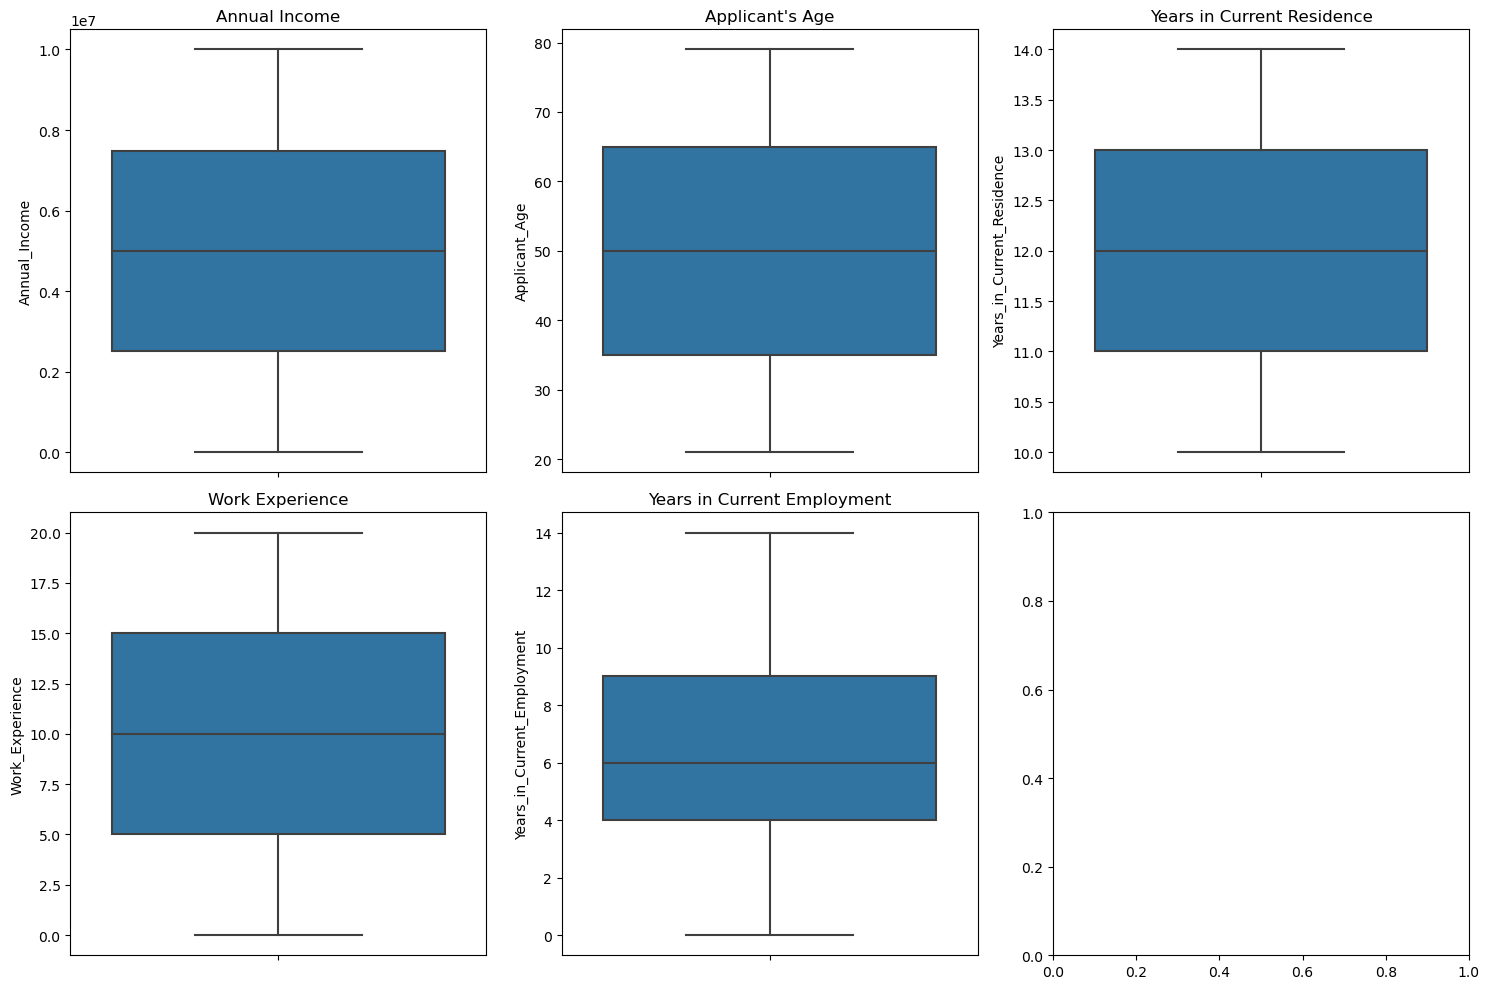

In [62]:
# Plot mulitplot boxplots inot one output
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Annual Income
sns.boxplot(y=df['Annual_Income'], ax=axs[0, 0])
axs[0, 0].set_title('Annual Income')

# Applicant's age
sns.boxplot(y=df['Applicant_Age'], ax=axs[0, 1])
axs[0, 1].set_title("Applicant's Age")

# Work Experience
sns.boxplot(y=df['Work_Experience'], ax=axs[1, 0])
axs[1, 0].set_title('Work Experience')

# Years in Current Employment
sns.boxplot(y=df['Years_in_Current_Employment'], ax=axs[1, 1])
axs[1, 1].set_title('Years in Current Employment')

#Years in Current Residence
sns.boxplot(y=df['Years_in_Current_Residence'], ax=axs[0,2])
axs[0,2].set_title('Years in Current Residence')

plt.tight_layout()
plt.show()

   - from the boxplots, there is a clear indication that our data does not have outliers

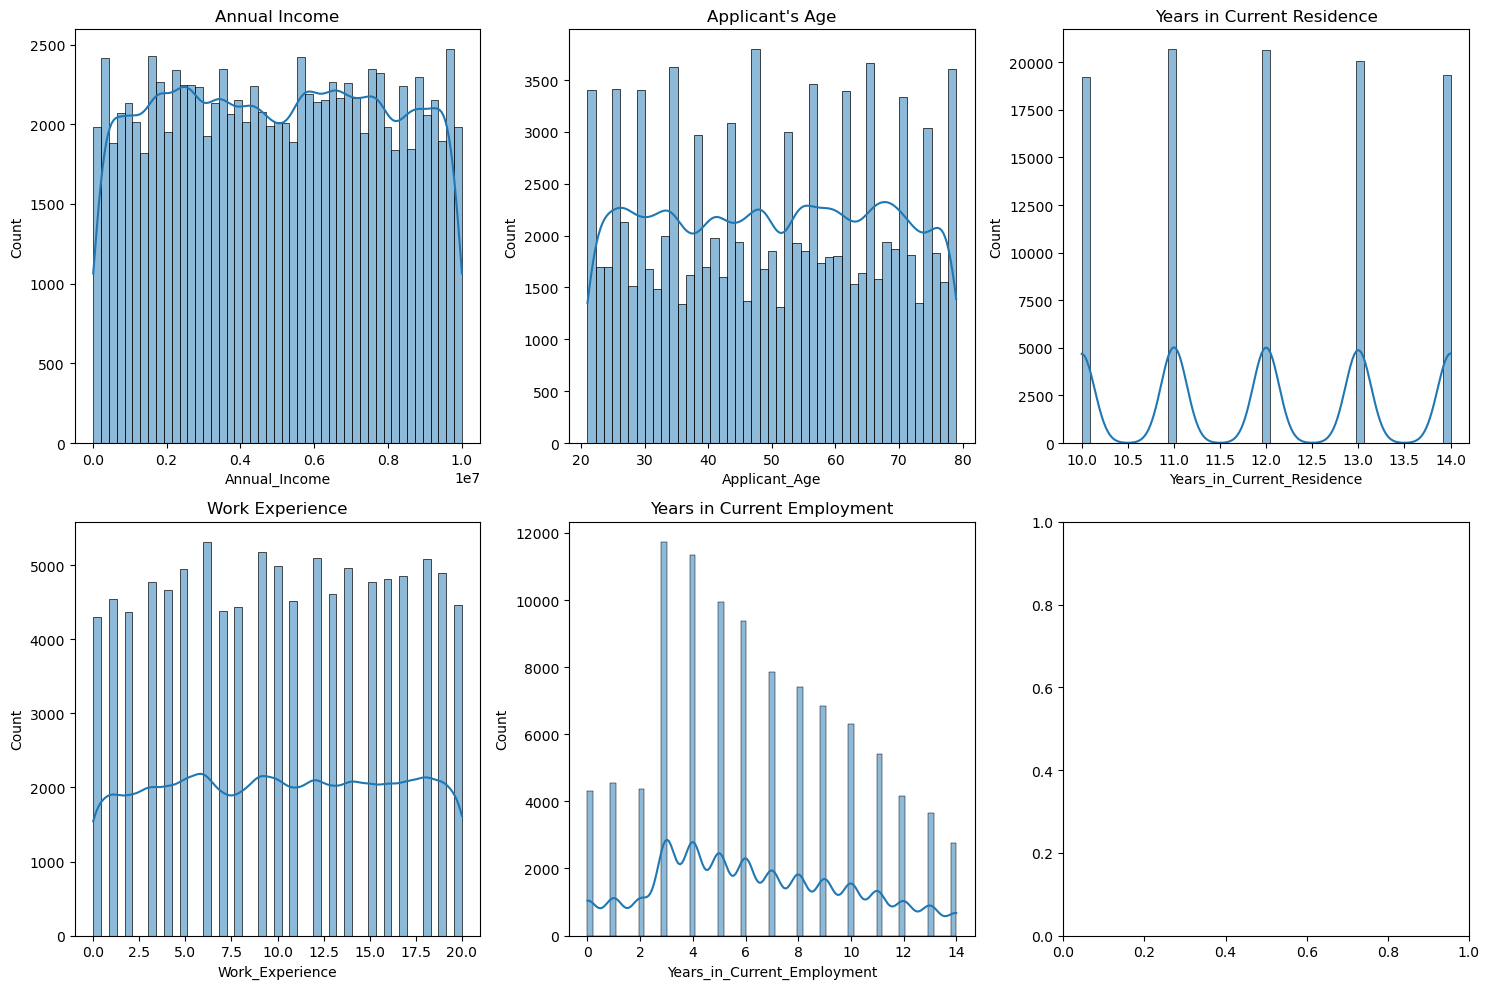

In [63]:
####Plot histogram to show how the numeric variables are distributed
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Annual Income
sns.histplot(x=df['Annual_Income'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Annual Income')

# Applicant's age
sns.histplot(x=df['Applicant_Age'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Applicant's Age")

# Work Experience
sns.histplot(x=df['Work_Experience'],kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Work Experience')

# Years in Current Employment
sns.histplot(x=df['Years_in_Current_Employment'],kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Years in Current Employment')

#Years in Current Residence
sns.histplot(x=df['Years_in_Current_Residence'],kde=True, ax=axs[0,2])
axs[0,2].set_title('Years in Current Residence')

plt.tight_layout()
plt.show()

- Findings:
    - In addition, numerical variables do not follow normal distribution, since there are no tails and peaks, hence we can deduce the values follows a uniform distribution with exception of Years in current employement which is fairly uniformly distribute aand somehow normally distributed.
    

###### Categorical data descriptives

In [64]:
cat_data = df[['Marital_Status','House_Ownership','Vehicle_Ownership(car)','Occupation','new_Loan_Default_Risk']]
cat_data.describe()

,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,new_Loan_Default_Risk
count,100000,100000,100000,100000,100000
unique,2,3,2,51,2
top,single,rented,no,Physician,non default
freq,89763,92088,69665,2426,87003


#### Explatory Data Analysis

In [65]:
# Marital Status
counts_ms = df['Marital_Status'].value_counts()
perc_ms = df['Marital_Status'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_ms,perc_ms], axis=1, keys=['count', 'percentage'])

,count,percentage
single,89763,89.80
married,10237,10.20


In [66]:
# House Ownership
counts_ho = df['House_Ownership'].value_counts()
perc_ho = df['House_Ownership'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_ho,perc_ho], axis=1, keys=['count', 'percentage'])

,count,percentage
rented,92088,92.10
owned,5081,5.10
norent_noown,2831,2.80


In [67]:
# Vehicle Ownership(car)
counts_vo = df['Vehicle_Ownership(car)'].value_counts()
perc_vo = df['Vehicle_Ownership(car)'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_vo,perc_vo], axis=1, keys=['count', 'percentage'])

,count,percentage
no,69665,69.70
yes,30335,30.30


In [68]:
# Occupation
counts_o = df['Occupation'].value_counts()
perc_o = df['Occupation'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_o,perc_o], axis=1, keys=['count', 'percentage'])

,count,percentage
Physician,2426,2.40
Statistician,2338,2.30
Fashion_Designer,2189,2.20
Psychologist,2188,2.20
Magistrate,2169,2.20
Computer_hardware_engineer,2169,2.20
Web_designer,2153,2.20
Drafter,2133,2.10
Comedian,2103,2.10
Mechanical_engineer,2097,2.10


- We need to clean up abit the occupation column by categorizing in to umbrella groups for ease of analysis
- To categorize these professions into groups with similar approaches, we can consider various criteria such as the nature of work, skills required, work environment, and professional goals.

1. Engineering and Technology: 
   - Petroleum Engineer
   - Biomedical Engineer
   - Mechanical Engineer
   - Computer Hardware Engineer
   - Chemical Engineer
   - Civil Engineer
   - Industrial Engineer
   - Software Developer
   - Web Designer
   - Design Engineer
   - Technology Specialist
   - Drafter
   - Engineer
   - Software Developer
   - Architect
   

2. Finance and Accounting: 
   - Chartered Accountant
   - Financial Analyst

3. Legal and Judicial: 
   - Lawyer
   - Magistrate

4. Healthcare and Medicine: 
   - Physician
   - Dentist
   - Surgeon
   - Microbiologist
   - Psychologist

5. Creative and Design: 
   - Fashion Designer
   - Graphic Designer
   - Artist
   - Designer

6. Aerospace and Aviation: 
   - Air Traffic Controller
   - Aviator
   - Flight Attendant

7. Government and Public Service: 
   - Civil Servant
   - Politician
   - Army Officer
   - Police Officer
   - Official

8. Education and Research: 
   - Psychologist
   - Scientist
   - Librarian
   - Geologist

9. Management and Administration: 
   - Hotel Manager
   - Consultant
   - Secretary

10. Other Professions: 
    - Economist
    - Statistician
    - Analyst
    - Technician
    - Surveyor
    - Technical Writer
    - Computer Operator
    - Firefighter
    - Comedian
    - Chef

- This categorization is based on broad similarities in the nature of work and professional focus. However, there can be overlap between categories, and some professions may fit into multiple groups depending on specific criteria.

In [69]:
# create new column Occupation groups
Engineering_Technology = ['Petroleum_Engineer','Biomedical_Engineer','Mechanical_engineer','Computer_hardware_engineer',
                          'Chemical_engineer','Civil_engineer','Industrial_Engineer','Software_Developer','Web_designer',
                          'Design_Engineer','Technology_specialist','Drafter','Engineer','Software_Developer','Architect']

Finance_Accounting = ['Chartered_Accountant','Financial_Analyst']

Legal_Judicial = ['Lawyer','Magistrate']

Healthcare_Medicine = ['Physician','Dentist','Surgeon','Microbiologist','Psychologist']

Creative_Design = ['Fashion_Designer','Graphic_Designer','Artist','Designer']

Aerospace_Aviation = ['Air_traffic_controller','Aviator','Flight_attendant']

Government_Public_Service = ['Civil_servant','Politician','Army_officer','Police_officer','Official']

Education_Research = ['Psychologist','Scientist','Librarian','Geologist']

Management_Administration = ['Hotel_Manager','Consultant','Secretary']

Other_Professions = ['Economist','Statistician','Analyst','Technician','Surveyor','Technical_writer','Computer_operator',
                     'Firefighter','Comedian','Chef']

def categorize_occupation(occupation):
    if any(item in occupation for item in Engineering_Technology):
        return 'Engineering Technology'
    elif any(item in occupation for item in Finance_Accounting):
        return 'Finance Accounting'
    elif any(item in occupation for item in Legal_Judicial):
        return 'Legal Judicial'
    elif any(item in occupation for item in Healthcare_Medicine):
        return 'Healthcare Medicine'
    elif any(item in occupation for item in Creative_Design):
        return 'Creative Design'
    elif any(item in occupation for item in Aerospace_Aviation):
        return 'Aerospace Aviation'
    elif any(item in occupation for item in Government_Public_Service):
        return 'Government Public Service'
    elif any(item in occupation for item in Education_Research):
        return 'Education Research'
    elif any(item in occupation for item in Management_Administration):
        return 'Management Administration'
    else:
        return 'Other Professions'

df['Occupation_Group'] = df['Occupation'].apply(categorize_occupation)

In [70]:
# Occupation Groups
counts_og = df['Occupation_Group'].value_counts()
perc_og = df['Occupation_Group'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_og,perc_og], axis=1, keys=['count', 'percentage'])

,count,percentage
Engineering Technology,27774,27.80
Other Professions,19420,19.40
Healthcare Medicine,10336,10.30
Government Public Service,9060,9.10
Creative Design,7955,8.00
Aerospace Aviation,6013,6.00
Management Administration,6007,6.00
Education Research,5525,5.50
Legal Judicial,4075,4.10
Finance Accounting,3835,3.80


In [71]:
# Loan Default Risk
counts_ld = df['new_Loan_Default_Risk'].value_counts()
perc_ld = df['new_Loan_Default_Risk'].value_counts(normalize=True).mul(100).round(1)
pd.concat([counts_ld,perc_ld], axis=1, keys=['count', 'percentage'])

,count,percentage
non default,87003,87.00
default,12997,13.00


##### visualize to show the distributions

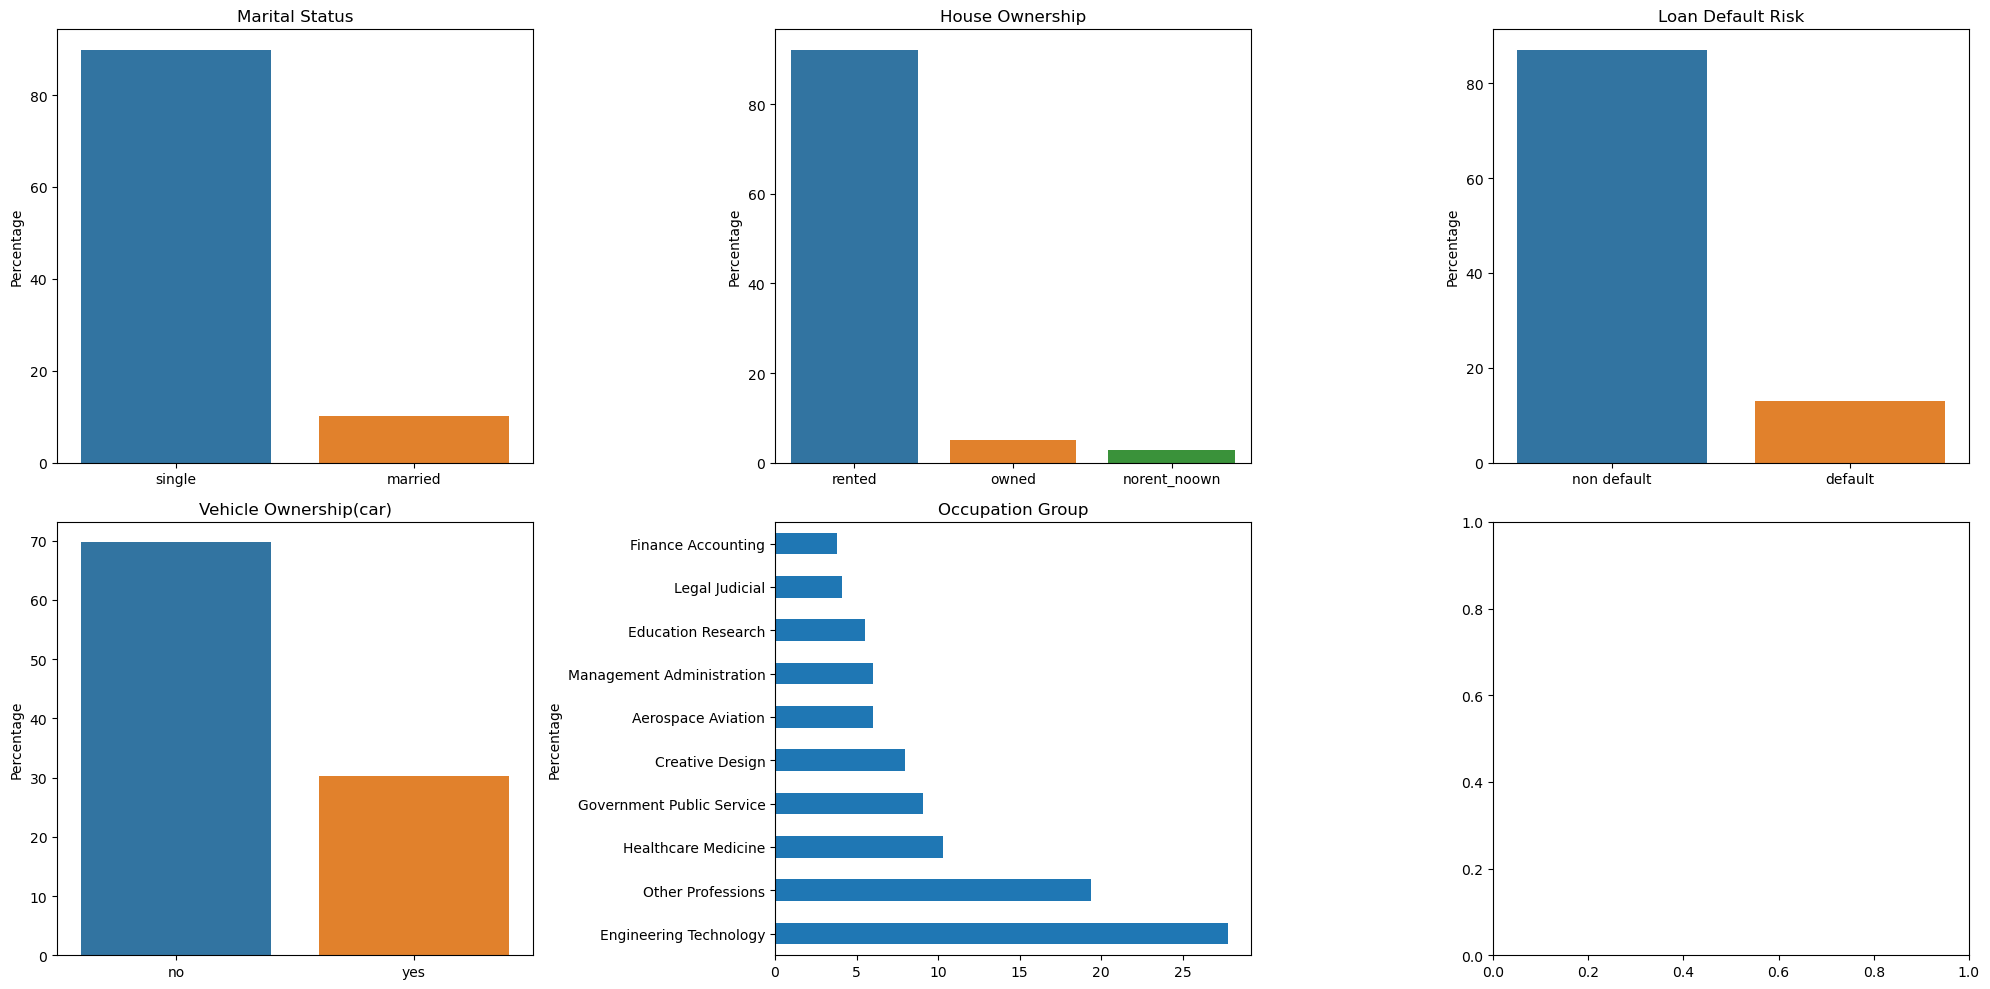

In [72]:
# Plot mulitplot boxplots inot one output
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Marital Status
sns.barplot(x = df['Marital_Status'].unique(), y= perc_ms, ax=axs[0, 0])
axs[0, 0].set_title('Marital Status')
axs[0, 0].set_ylabel('Percentage')

# House Ownership
sns.barplot(x =df['House_Ownership'].unique(), y=perc_ho, ax=axs[0, 1])
axs[0, 1].set_title("House Ownership")
axs[0, 1].set_ylabel('Percentage')

# Vehicle Ownership(car)
sns.barplot(x= df['Vehicle_Ownership(car)'].unique(), y = perc_vo, ax=axs[1, 0])
axs[1, 0].set_title('Vehicle Ownership(car)')
axs[1, 0].set_ylabel('Percentage')

# Occupation Group
df['Occupation_Group'].value_counts(normalize=True).mul(100).round(1).plot.barh(ax=axs[1, 1])
axs[1, 1].set_title('Occupation Group')
axs[1, 1].set_ylabel('Percentage')

# Loan Default Risk
sns.barplot(x = df['new_Loan_Default_Risk'].unique(), y = perc_ld, ax=axs[0, 2])
axs[0, 2].set_title('Loan Default Risk')
axs[0, 2].set_ylabel('Percentage')

plt.tight_layout()

- Findings:
    - It can be inferred from the above analysis
        - 90% of applicants are Single
        - Majority of the applicants (92%) live in rented houses
        - About 70% of applicants do not own vehicles(car)
        - Majority(87%) of Applicants are less likely to default on paying the loan
        - Most applicants are in the Engineering and Technology industry interms of occupation followed closely with Other professions who were not specific interms of industry they fall in.

#### We need to investigate our hypothesis by exploring the data variables against the Loan Default Risk

- Applicants with a higher annual income are less likely to default on the loan.
- Older applicants are less likely to default on the loan
- The more the number of years of experience the less likely to default on the loan
- Married applicants are less likely to default on the loan
- Applicants who own either vehicle/house are less likely to default on the loan
- The more the years working in the current employment the less likely to default on the loan
- The more the years under current residence less likely to default on the loan

##### Bivariate analysis: Analysing categorical variables against loan default risk (Cross-tabulations)

In [73]:
from scipy import stats

#1. marital status by Loan default risk
marital = pd.crosstab(df['Marital_Status'], df['new_Loan_Default_Risk'])
chi1, p1, dof1, expected1 = stats.chi2_contingency(marital)

#2. House ownership by Loan default risk
house = pd.crosstab(df['House_Ownership'], df['new_Loan_Default_Risk'])
chi2, p2, dof2, expected2 = stats.chi2_contingency(house)

#3. Vehicle ownership by Loan default risk
vehicle = pd.crosstab(df['Vehicle_Ownership(car)'], df['new_Loan_Default_Risk'])
chi3, p3, dof3, expected3 = stats.chi2_contingency(vehicle)

#4. Occupation by Loan default risk
Occupation = pd.crosstab(df['Occupation_Group'], df['new_Loan_Default_Risk'])
chi4, p4, dof4, expected4 = stats.chi2_contingency(Occupation)

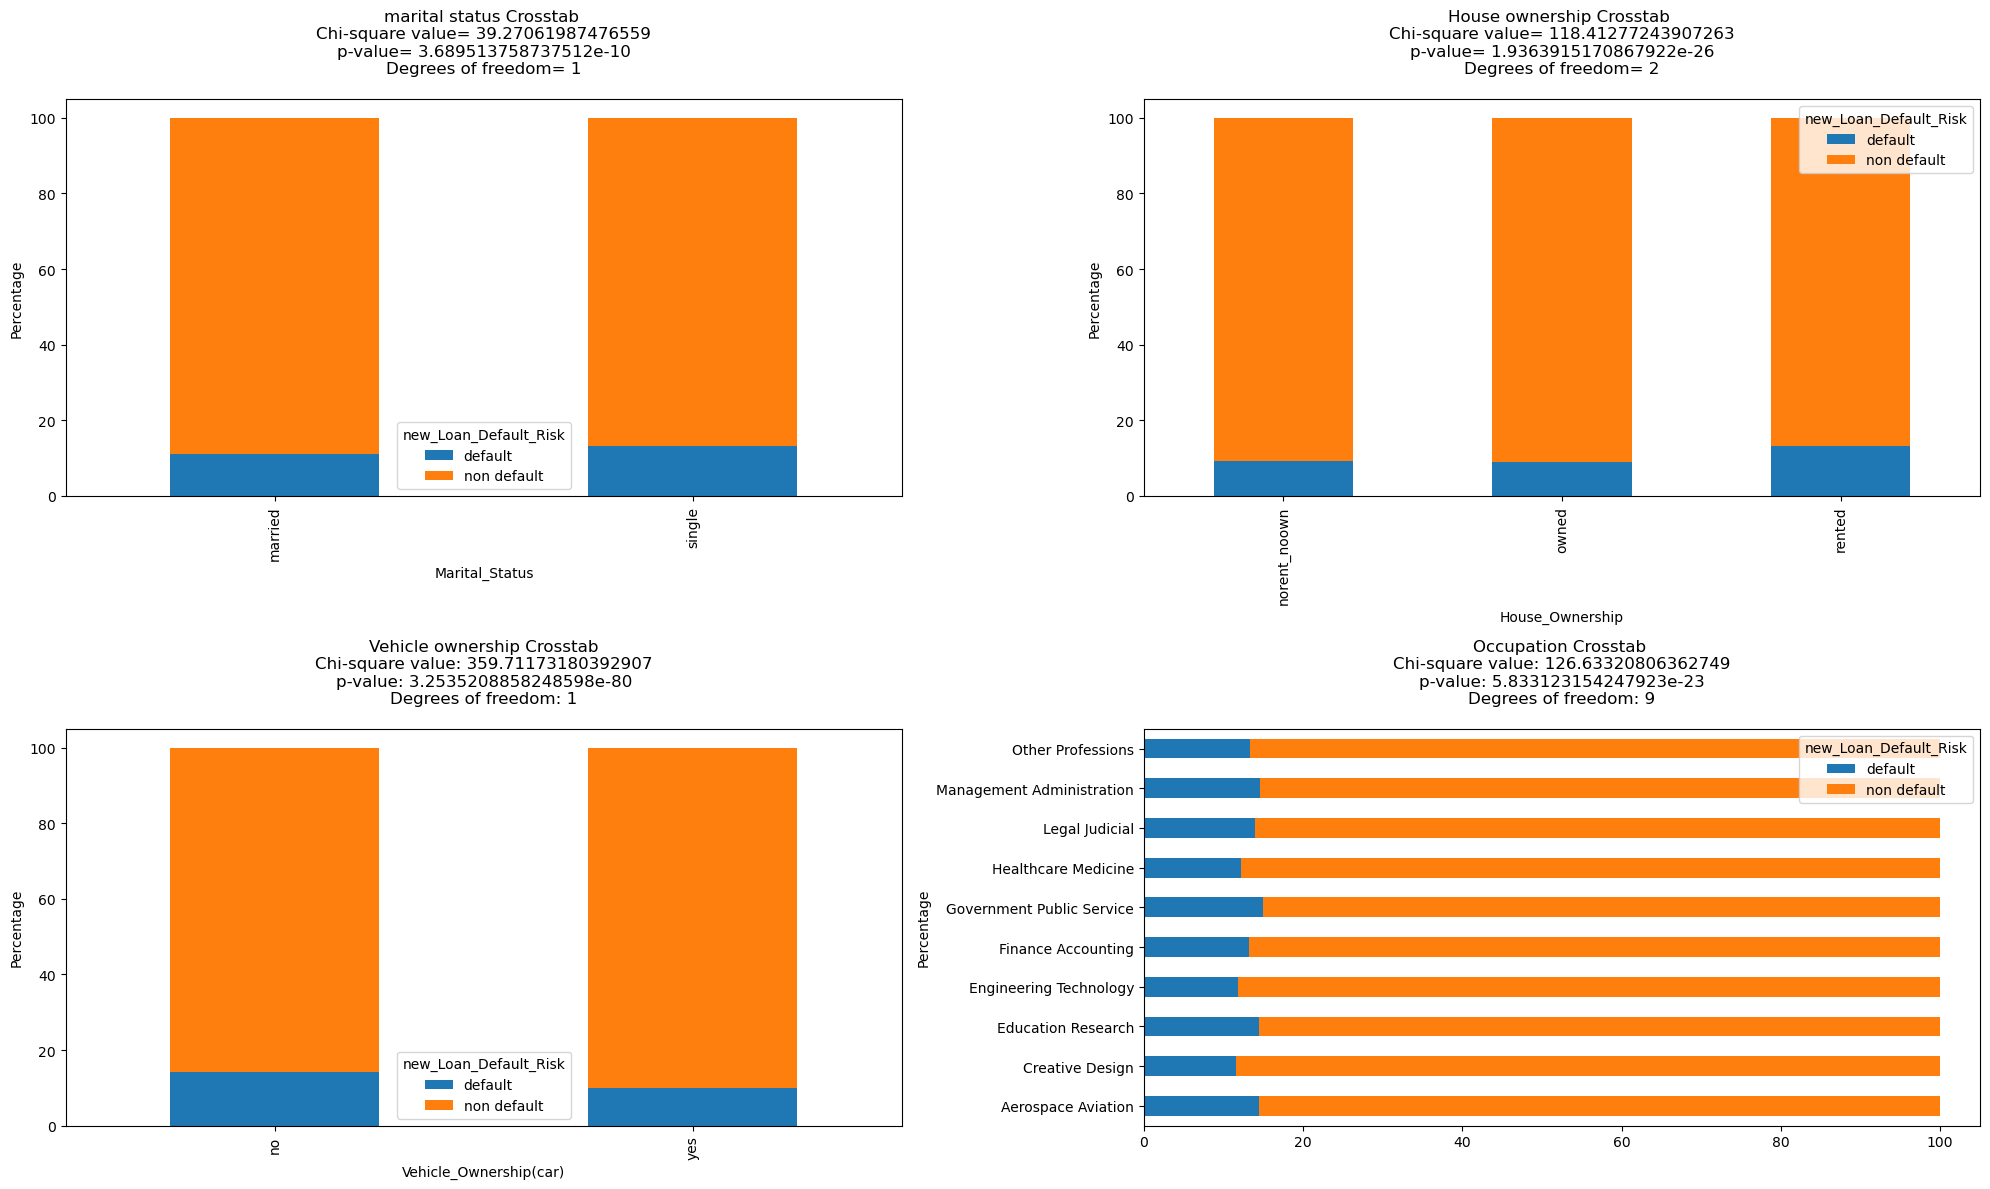

In [74]:
# visualizing
nl= "\n"
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
#1. marital status by Loan default risk
marital.div(marital.sum(1).astype(float), axis=0).mul(100).plot.bar(stacked=True,ax=axs[0,0])
axs[0, 0].set_title(f"marital status Crosstab {nl}Chi-square value= {chi1}{nl}p-value= {p1}{nl}Degrees of freedom= {dof1}{nl}")
axs[0, 0].set_ylabel('Percentage')

#2. House ownership by Loan default risk
house.div(house.sum(1).astype(float), axis=0).mul(100).plot.bar(stacked=True,ax=axs[0,1])
axs[0, 1].set_title(f"House ownership Crosstab {nl}Chi-square value= {chi2}{nl}p-value= {p2}{nl}Degrees of freedom= {dof2}{nl}")
axs[0, 1].set_ylabel('Percentage')

#3. Vehicle ownership by Loan default risk
vehicle.div(vehicle.sum(1).astype(float), axis=0).mul(100).plot.bar(stacked=True,ax=axs[1,0])
axs[1, 0].set_title(f"Vehicle ownership Crosstab{nl}Chi-square value: {chi3}{nl}p-value: {p3}{nl}Degrees of freedom: {dof3}{nl}")
axs[1, 0].set_ylabel('Percentage')

#4. Occupation by Loan default risk
Occupation.div(Occupation.sum(1).astype(float), axis=0).mul(100).plot.barh(stacked=True,ax=axs[1, 1])
axs[1, 1].set_title(f"Occupation Crosstab {nl}Chi-square value: {chi4}{nl}p-value: {p4}{nl}Degrees of freedom: {dof4}{nl}")
axs[1, 1].set_ylabel('Percentage')

plt.tight_layout()

Findings:
   - Marital ststus:
       - Despite the proportion of married applicants being slightly higher than that for single applicants interms of loan default count, there is a relationship between marital status and probability of defaulting on a loan since the p-value<0.05 .
          risk. 
        - Deduce: Applicants who are married are less likely to default on loan as compare to the single status applicants.
   - Vehicle ownership: 
        - The proportion of applicants with likelihood of defaulting on loan and do not own vehicles(car) is slightly higher than their counter parts who do own vehicle(car). 
        - There is a significant association between Vehicle ownership and likelihood to default on loan basing with a p-value<0.05
        - Deduce: Applicants who owns vehicle are less likely to default on the loan as compared to those who dont own one.
   - House ownership:
       - The percentage of applicants renting has high loan default risk as compared to those who own home and those who do not own or rent a house.
       - There is fairly no difference in proportion for applicants defaulting on a loan, and do not own a house with those owning house.
       - Nonetheless, there is a significance association bewteen house ownership status to defaulting of loan with a p-value < 0.05.
       - Deduce: Applicants who rents house are more likely to default on the loan as compared to those who owns house.
   - Occupation group:
        - Applicants who work either in Government public services or management and administration are most likely to default on loan, recording a loan default risk rate of above 14.5% each.
        - There is a notable significance association between occupation and loan default risk, shown by the p-value <0.05.
        - Deduce: Applicants in industries other than government or management and administrative industry, are less likely to default on loan

From our the findings, the data tends to concur with our hypothesis that:
- Hypothesis 4: Married applicants are less likely to default on the loan
- Hypothesis 5: Applicants who own either vehicle/house are less likely to default on the loan
- Hypothesis 6: The more the years working in the current employment the less likely to default on the loan


##### Explore numerical variables vs Target variable (Cross-tabulations)

##### Bivariate analysis: Analysing numerical variables against loan default risk (Cross-tabulations)

###### 1. Annual Income by Loan default risk

new_Loan_Default_Risk
default       4974142.42
non default   5005721.34
Name: Annual_Income, dtype: float64


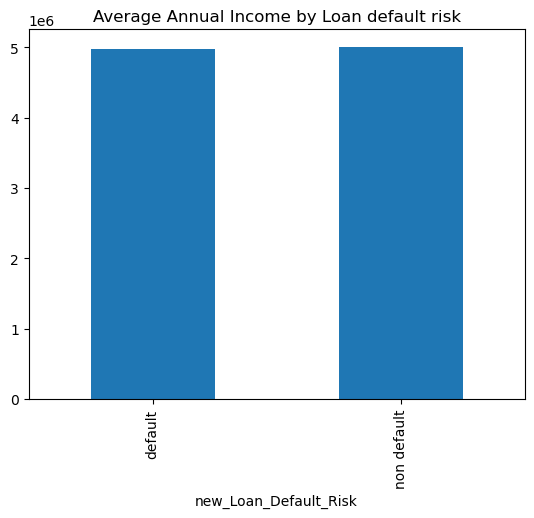

In [75]:
# View
df.groupby('new_Loan_Default_Risk')['Annual_Income'].mean().plot.bar()
plt.title('Average Annual Income by Loan default risk')
print(df.groupby('new_Loan_Default_Risk')['Annual_Income'].mean())

- Average Annual income of Applicant's who are loan non-defaulters is slightly higher than the loan defaulters

- We are unable to infer any insights from above average annual income graph, instead We will break down our annual income variable into groups, as categorised by: 
 - cyton article: https://cytonn.com/blog/article/ideal-areas-to-live-in-nairobi-for-different-incomes#:~:text=According%20to%20the%20Economic%20survey,the%20Upper%20income%20group%20enjoys
 - Business daily: https://www.businessdailyafrica.com/bd/news/74pc-of-salaried-kenyans-earn-less-than-sh50-000-2228858 
    - Very low (Lower class) : Ksh. 284,000 and Below
    - Low (Lower middle class): Ksh. 284,000 to Ksh.600,000
    - Average (Middle class): Ksh. 600,000 to Ksh. 1,200,000
    - High (Upper middle class): Ksh. 1,200,000 to Ksh. 2,400,000
    - Very high (High income class): Ksh. 2,400,000 and above

Text(0, 0.5, 'Percentage')

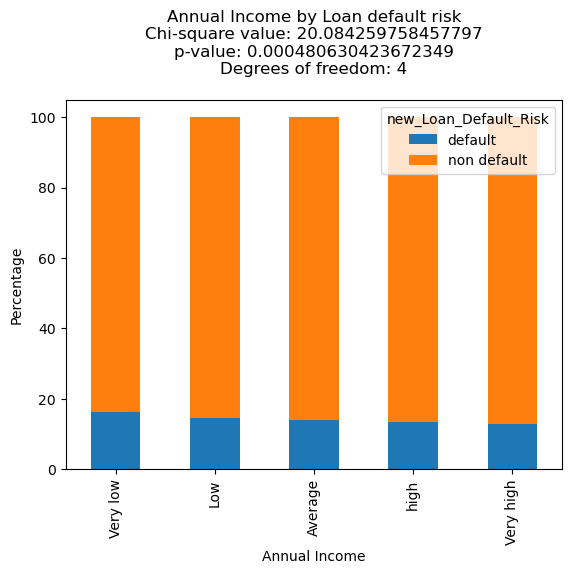

In [76]:
# Annual Income by Loan default risk
inc_bin=[0,284000,600000,120000,2400000,10000000]
inc_bin.sort()

group=['Very low','Low','Average', 'high', 'Very high']

df['Annual_income_groups']=pd.cut(df['Annual_Income'],inc_bin,labels=group)

Annual_income_groups=pd.crosstab(df['Annual_income_groups'],df['new_Loan_Default_Risk'])
inc_chi2, inc_p, inc_dof, inc_expected = stats.chi2_contingency(Annual_income_groups)
Annual_income_groups.div(Annual_income_groups.sum(1).astype(float), axis=0).mul(100).plot(kind="bar", stacked=True)
plt.title(f"Annual Income by Loan default risk{nl}Chi-square value: {inc_chi2}{nl}p-value: {inc_p}{nl}Degrees of freedom: {inc_dof}{nl}")
plt.xlabel('Annual Income') 
plt.ylabel('Percentage')

Findings:
- From the graph, we can report that applicant's with Very low income have slightly higher loan default risk.
- Significance level is with a p-value<0.05, suggests that there is a relationship between the annual income and Loan default risk
- Conclude: Applicants with a higher annual income are less likely to default on the loan.

###### 2. Applicant Age by Loan default risk

- Average Age of Applicant's who are loan non-defaulters is slightly higher than the loan defaulters

In [77]:
print(df.groupby('new_Loan_Default_Risk')['Applicant_Age'].mean())

new_Loan_Default_Risk
default       49.02
non default   50.14
Name: Applicant_Age, dtype: float64


We categorize age into groups
- Index mundi article: https://www.indexmundi.com/Kenya/age_structure.html#:~:text=Information%20is%20included%20by%20sex,years%20and%20over%20(elderly)
  - 15 - 24 years
  - 25 - 54 years
  - 55 - 64 years
  - 64 years and above

Text(0, 0.5, 'Percentage')

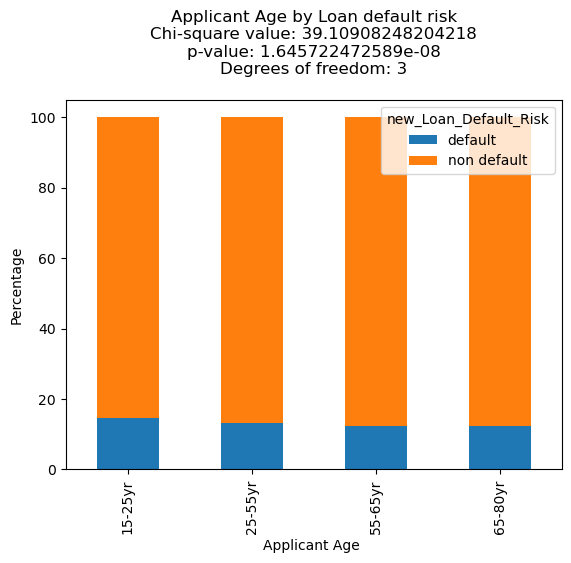

In [78]:
# Applicant Age by Loan default risk
age_bin=[15,25,55,65,80, np.inf]
age_bin.sort()

age_group=['15-25yr','25-55yr','55-65yr', '65-80yr','80yr+']

df['Applicant_Age_groups']=pd.cut(df['Applicant_Age'],age_bin,labels=age_group)

Applicant_Age_groups=pd.crosstab(df['Applicant_Age_groups'],df['new_Loan_Default_Risk'])

age_chi2, age_p, age_dof, age_expected = stats.chi2_contingency(Applicant_Age_groups)

Applicant_Age_groups.div(Applicant_Age_groups.sum(1).astype(float), axis=0).mul(100).plot(kind="bar", stacked=True)
plt.title(f"Applicant Age by Loan default risk{nl}Chi-square value: {age_chi2}{nl}p-value: {age_p}{nl}Degrees of freedom: {age_dof}{nl}")
plt.xlabel('Applicant Age ') 
plt.ylabel('Percentage')

Findings:
- From the graph, proportion of loan default risk accross all age groups are almost the same.
- Significance level is with a p-value<0.05, suggesting that there is slight relationship between the applicant age and Loan default risk
- Conclude: Results contradicts our hypothesis, hence applicant's age has low effect on applicants probability to default on loan.

###### 3. Applicant Work Experience by Loan default risk

- Average Work Experience of Applicant's who are loan non-defaulters is slightly higher than the loan defaulters

In [79]:
print(df.groupby('new_Loan_Default_Risk')['Work_Experience'].mean())

new_Loan_Default_Risk
default        9.69
non default   10.17
Name: Work_Experience, dtype: float64


Text(0, 0.5, 'Percentage')

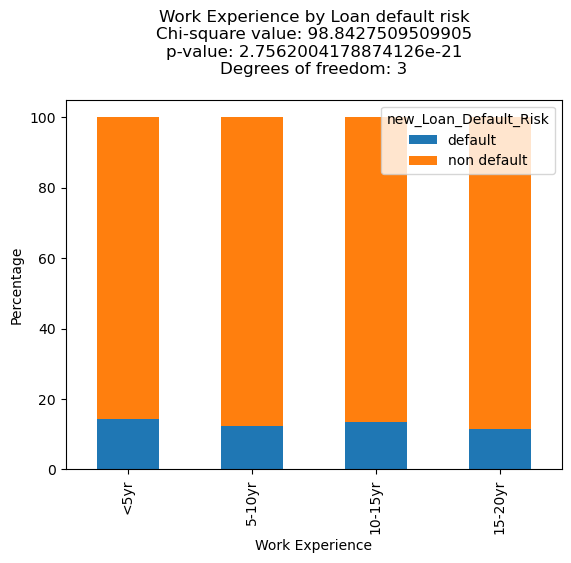

In [80]:
# Applicant Work Experience by Loan default risk
wrk_bin=[0,5,10,15,20,np.inf]
wrk_bin.sort()

wrk_group=['<5yr','5-10yr','10-15yr','15-20yr','20yr+']

df['Work_Experience_groups']=pd.cut(df['Work_Experience'],wrk_bin,labels=wrk_group)

df['Work_Experience_groups'] = df['Work_Experience_groups'].fillna('<5yr') # filling NaN which are 0 years

Work_Experience_groups=pd.crosstab(df['Work_Experience_groups'],df['new_Loan_Default_Risk'])

wrk_chi2, wrk_p, wrk_dof, wrk_expected = stats.chi2_contingency(Work_Experience_groups)

Work_Experience_groups.div(Work_Experience_groups.sum(1).astype(float), axis=0).mul(100).plot(kind="bar", stacked=True)
plt.title(f"Work Experience by Loan default risk{nl}Chi-square value: {wrk_chi2}{nl}p-value: {wrk_p}{nl}Degrees of freedom: {wrk_dof}{nl}")
plt.xlabel('Work Experience') 
plt.ylabel('Percentage')

Findings:
- From the graph, proportion of loan default risk accross all work experience groups are almost the same.
- Significance level is with a p-value<0.05, suggesting that there is slight relationship between the applicant's working experience and Loan default risk
- Conclude: Results contradicts our hypothesis, thus applicant's work experience has weak effect on applicants chance of defaulting on loan.

###### 4. Applicant Years in Current Employment by Loan default risk

- Average years in current employment of Applicants who are loan non-defaulters are almost equal to the loan defaulters

In [81]:
print(df.groupby('new_Loan_Default_Risk')['Years_in_Current_Employment'].mean())

new_Loan_Default_Risk
default       6.30
non default   6.35
Name: Years_in_Current_Employment, dtype: float64


Text(0, 0.5, 'Percentage')

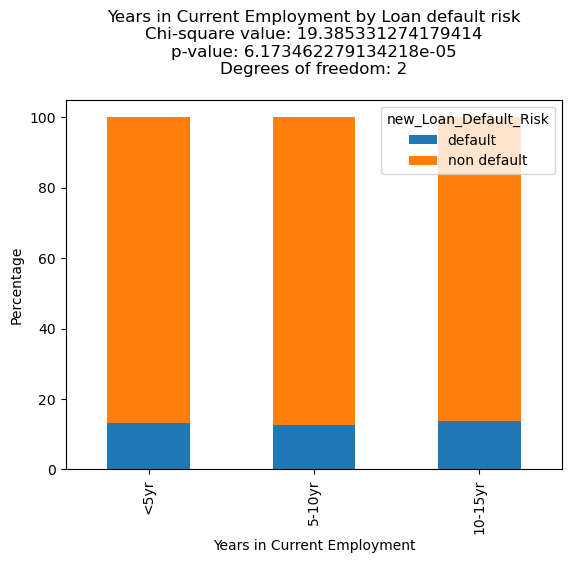

In [82]:
# Applicant Years in Current Employment by Loan default risk
curr_wrk_bin=[0,5,10,15,np.inf]
curr_wrk_bin.sort()

curr_wrk_group=['<5yr','5-10yr','10-15yr','15yr+']

df['Years_in_Current_Employment_groups']=pd.cut(df['Years_in_Current_Employment'],curr_wrk_bin,labels=curr_wrk_group)

df['Years_in_Current_Employment_groups'] = df['Years_in_Current_Employment_groups'].fillna('<5yr') # filling NaN which are 0 years in current employment

Years_in_Current_Employment_groups=pd.crosstab(df['Years_in_Current_Employment_groups'],df['new_Loan_Default_Risk'])

curr_wrk_chi2, curr_wrk_p, curr_wrk_dof, curr_wrk_expected = stats.chi2_contingency(Years_in_Current_Employment_groups)

Years_in_Current_Employment_groups.div(Years_in_Current_Employment_groups.sum(1).astype(float), axis=0).mul(100).plot(kind="bar", stacked=True)
plt.title(f"Years in Current Employment by Loan default risk{nl}Chi-square value: {curr_wrk_chi2}{nl}p-value: {curr_wrk_p}{nl}Degrees of freedom: {curr_wrk_dof}{nl}")
plt.xlabel('Years in Current Employment') 
plt.ylabel('Percentage')

Findings:
- From the graph, proportion of loan default risk accross all current work experience groups are almost the same.
- Significance level is with a p-value<0.05, suggesting that there is a slight relationship between the applicant's current working experience and Loan default risk
- Conclude: Results contradicts our hypothesis, thus applicant's current work experience has weak effect on applicants chance of defaulting on loan.

###### 5. Applicant Years in Current Residence by Loan default risk

- Average years in current residence of Applicants who are loan non-defaulters are almost similar to the loan defaulters

In [83]:
print(df.groupby('new_Loan_Default_Risk')['Years_in_Current_Residence'].mean())

new_Loan_Default_Risk
default       11.98
non default   12.00
Name: Years_in_Current_Residence, dtype: float64


Text(0, 0.5, 'Percentage')

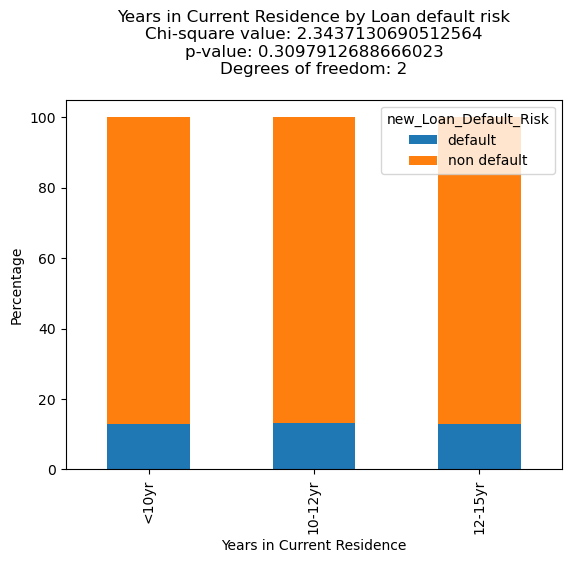

In [84]:
# Applicant Years in Current Residence by Loan default risk
curr_res_bin=[0,10,12,14,np.inf]
curr_res_bin.sort()

curr_res_group=['<10yr','10-12yr','12-15yr','15yr+']

df['Years_in_Current_Residence_groups']=pd.cut(df['Years_in_Current_Residence'],curr_res_bin,labels=curr_res_group)

Years_in_Current_Residence_groups=pd.crosstab(df['Years_in_Current_Residence_groups'],df['new_Loan_Default_Risk'])

curr_res_chi2, curr_res_p, curr_res_dof, curr_res_expected = stats.chi2_contingency(Years_in_Current_Residence_groups)

Years_in_Current_Residence_groups.div(Years_in_Current_Residence_groups.sum(1).astype(float), axis=0).mul(100).plot(kind="bar", stacked=True)
plt.title(f"Years in Current Residence by Loan default risk{nl}Chi-square value: {curr_res_chi2}{nl}p-value: {curr_res_p}{nl}Degrees of freedom: {curr_res_dof}{nl}")
plt.xlabel('Years in Current Residence') 
plt.ylabel('Percentage')

Findings:
- From the graph, proportion of loan default risk accross all number of years in current residence groups are almost the same.
- Significance level is with a p-value>0.05, suggesting that there is no relationship between the applicant's cnumber of years in current residence and Loan default risk
- Conclude: Results contradicts our hypothesis, thus applicant's number of years in current residence has no effect on applicants chance of defaulting on loan.

##### Export cleaned data for visualization

In [85]:
clean_data = df.to_csv('clean_data.csv', index=False)

  ##### Feature engineering

- Inorder to choose the features that will assist in building our model, we will need to check the correlation between the numeric variables 

<Axes: >

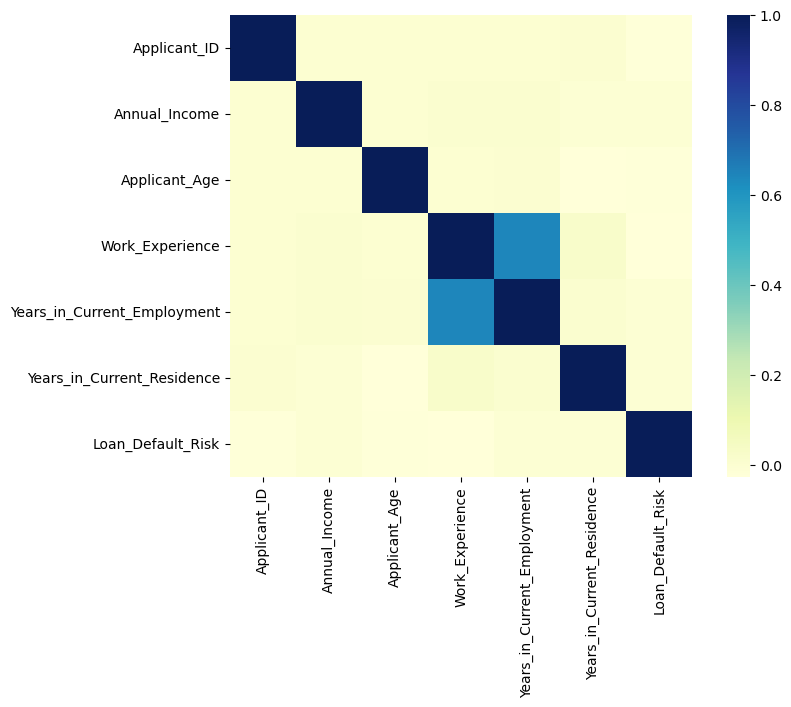

In [86]:
num_data = df.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(num_data , square=True, cmap="YlGnBu")

Findings:
- From the data, all the variables are not correlated to each other except for Work experience which correlated with Years in current employement variables.

###### Using Weight of Evidence in selecting our predictors 

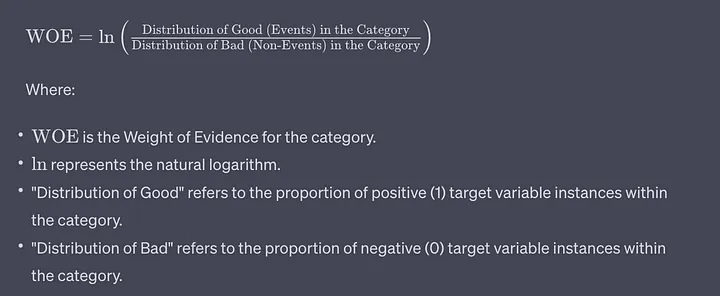

###### We need also to calculate the Information Value

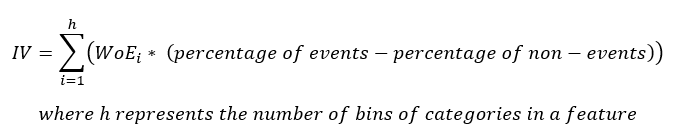

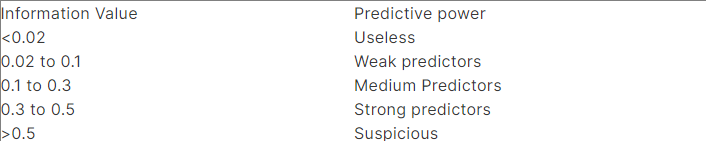

###### we need to first encode our data sets i.e. including the binned numerical dataset

######  Encode the data set

In [87]:
nw_data = df[['Marital_Status','House_Ownership','Vehicle_Ownership(car)','Occupation_Group','Annual_income_groups',
              'Applicant_Age_groups', 'Work_Experience_groups','Years_in_Current_Employment_groups',
              'Years_in_Current_Residence_groups']]

In [88]:
df_encoded=pd.get_dummies(nw_data,columns=nw_data.columns)
df_encoded.head()

,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Vehicle_Ownership(car)_no,Vehicle_Ownership(car)_yes,Occupation_Group_Aerospace Aviation,Occupation_Group_Creative Design,Occupation_Group_Education Research,...,Work_Experience_groups_15-20yr,Work_Experience_groups_20yr+,Years_in_Current_Employment_groups_<5yr,Years_in_Current_Employment_groups_5-10yr,Years_in_Current_Employment_groups_10-15yr,Years_in_Current_Employment_groups_15yr+,Years_in_Current_Residence_groups_<10yr,Years_in_Current_Residence_groups_10-12yr,Years_in_Current_Residence_groups_12-15yr,Years_in_Current_Residence_groups_15yr+
0,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [89]:
df_encoded['Loan_Default_Risk'] = df['Loan_Default_Risk']

In [90]:
df_encoded.isnull().sum().sum() #checking for null

0

In [91]:
df_encoded.shape #checking the shape of the newly transformed(encoded) data 

(100000, 41)

###### creating the function to compute the Weight of Evidence and Information value for the new encoded variables

In [92]:
def calculate_woe_iv(df, var_list, target_var):
    woe_iv_values = {}
    for var in var_list:
        # Calculate WOE and IV
        category_counts = df[var].value_counts()
        category_counts_pos = df[df[target_var] == 1][var].value_counts() # count the 1's in Loan default risk
        category_counts_neg = df[df[target_var] == 0][var].value_counts() # count the 0's in Loan default risk
        woe_values = {}
        iv = 0
        for category in category_counts.index:
            pos_count = category_counts_pos.get(category, 0)
            neg_count = category_counts_neg.get(category, 0)
            if pos_count == 0:
                pos_count = 0.5  # Handling edge case where numerator is 0
            if neg_count == 0:
                neg_count = 0.5  # Handling edge case where numerator is 0
            woe = np.log(pos_count / neg_count)
            woe_values[category] = woe
            iv += (pos_count / len(df[df[target_var] == 1]) - neg_count / len(df[df[target_var] == 0])) * woe
        woe_iv_values[var] = {'WOE': woe_values, 'IV': iv}
    return woe_iv_values

###### Apply the functions to our newly encoded data set

In [93]:
variables_list = df_encoded.columns[:-1]


target_var = 'Loan_Default_Risk'

woe_iv_values = calculate_woe_iv(df_encoded, variables_list, target_var)
for var, values in woe_iv_values.items():
    print(f"Variable: {var}")
    print(f"WOE: {values['WOE']}")
    if values['IV'] < 0.02:
        print(f"IV: {values['IV']}: useless")
    elif (values['IV'] >= 0.02) and (values['IV'] < 0.1) :
        print(f"IV: {values['IV']}: weak prediction power")
    elif (values['IV'] >= 0.1) and (values['IV'] < 0.3) :
        print(f"IV: {values['IV']}: medium prediction power")
    elif (values['IV'] >= 0.3) and (values['IV'] < 0.5) :
        print(f"IV: {values['IV']}: strong prediction power")
    elif (values['IV'] >= 0.5):
        print(f"IV: {values['IV']}: suspcious") 
    print()

Variable: Marital_Status_married
WOE: {0: -1.8814189690131518, 1: -2.0888167826868056}
IV: 0.0037141381405431106: useless

Variable: Marital_Status_single
WOE: {1: -1.8814189690131518, 0: -2.0888167826868056}
IV: 0.0037141381405431106: useless

Variable: House_Ownership_norent_noown
WOE: {0: -1.8912546345537589, 1: -2.2998682273601267}
IV: 0.0039729328322279656: useless

Variable: House_Ownership_owned
WOE: {0: -1.882498901799534, 1: -2.3119299398740405}
IV: 0.007685612088296927: useless

Variable: House_Ownership_rented
WOE: {1: -1.871557867278649, 0: -2.307600428109778}
IV: 0.012043563355058205: useless

Variable: Vehicle_Ownership(car)_no
WOE: {1: -1.7882637516812043, 0: -2.2040192045234406}
IV: 0.03410672745281612: weak prediction power

Variable: Vehicle_Ownership(car)_yes
WOE: {0: -1.7882637516812043, 1: -2.2040192045234406}
IV: 0.03410672745281612: weak prediction power

Variable: Occupation_Group_Aerospace Aviation
WOE: {0: -1.9095760993896023, 1: -1.7768986341262867}
IV: 0.001

In [94]:
# print variables that have Information value - range from 0.02 to 0.5
for var, values in woe_iv_values.items():
    if (values['IV'] >= 0.02) and (values['IV'] < 0.1) :
        print(f"Variable: {var} \n WOE: {values['WOE']} \n IV: {values['IV']} \n Decision: weak prediction power")
    elif (values['IV'] >= 0.1) and (values['IV'] < 0.3) :
        print(f"Variable: {var} \n WOE: {values['WOE']} \n IV: {values['IV']} \n Decision: medium prediction power")
    elif (values['IV'] >= 0.3) and (values['IV'] < 0.5) :
        print(f"Variable: {var} \n WOE: {values['WOE']} \n IV: {values['IV']} \n Decision: strong prediction power")
    elif (values['IV'] >= 0.5):
        print(f"Variable: {var} \n WOE: {values['WOE']} \n IV: {values['IV']} \n Decision: suspcious")
print()

Variable: Vehicle_Ownership(car)_no 
 WOE: {1: -1.7882637516812043, 0: -2.2040192045234406} 
 IV: 0.03410672745281612 
 Decision: weak prediction power
Variable: Vehicle_Ownership(car)_yes 
 WOE: {0: -1.7882637516812043, 1: -2.2040192045234406} 
 IV: 0.03410672745281612 
 Decision: weak prediction power



Results:
- Using Weight of Evidence and Information Value, clearly the Variable Vehicle_ownership has the prediction power however weaker.

  ##### Model selection

- We will fit all the variables as oredictors and our target to Logistic model to check the accuracy of prediction

In [95]:
from sklearn.model_selection import train_test_split

X = df_encoded.loc[:, df_encoded.columns != 'Loan_Default_Risk']
y = df_encoded['Loan_Default_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

###### Logistic regression since the target variable is binary and followa binomial distribution

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


  ##### Model Fine tuning by choosing predictors from the list

##### We need oversample to help increase model prediction from inaccurately predicting

In [98]:
Main_X = df_encoded.loc[:, df_encoded.columns != 'Loan_Default_Risk']
Main_y = df_encoded['Loan_Default_Risk']

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(Main_X, Main_y, test_size=0.3, random_state=2)
columns = X_train.columns
rus_X,rus_y=rus.fit_resample(X_train, y_train)
rus_X = pd.DataFrame(data=rus_X,columns=columns )
rus_y= pd.DataFrame(data=rus_y,columns=['y'])
# we can Check the numbers of our data
print("length of undersampled data is ",len(rus_X))
print("Number of applicant's with loan default risk in undersampled data",len(rus_y[rus_y['y']==0]))
print("Number of applicant's with no loan default risk",len(rus_y[rus_y['y']==1]))
print("Proportion of applicant's with loan default risk data in undersampled data is ",len(rus_y[rus_y['y']==1])/len(rus_X))
print("Proportion of applicant's with no loan default risk data in undersampled data is ",len(rus_y[rus_y['y']==0])/len(rus_X))

length of undersampled data is  18304
Number of applicant's with loan default risk in undersampled data 0
Number of applicant's with no loan default risk 0
Proportion of applicant's with loan default risk data in undersampled data is  0.0
Proportion of applicant's with no loan default risk data in undersampled data is  0.0


- over sampling and undersampling does make to solve the modelling

In [100]:
# Extracting Features for prediction using Recursive Feature Elimination
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df_encoded.loc[:, df_encoded.columns != 'Loan_Default_Risk']
y = df_encoded['Loan_Default_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

logreg = LogisticRegression()
rfe = RFE(logreg) # picking 30 features from the data
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

dat = pd.DataFrame()
dat['support'] = pd.DataFrame(rfe.support_)
dat['ranking'] = rfe.ranking_
dat['Variables'] = X_train.columns

[ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True False  True False False  True  True  True False
 False False False  True False False  True False False False  True False
 False False False False]
[ 1  1  1  1  1  1  1  1  1  3  1  7  1  1  9  1 13  1 11 12  1  1  1 10
  2  4 18  1  6 14  1 19  5  8  1 20 17 15 16 21]


In [101]:
###List of features by either picked or not picked for prediction
print(dat)

    support  ranking                                   Variables
0      True        1                      Marital_Status_married
1      True        1                       Marital_Status_single
2      True        1                House_Ownership_norent_noown
3      True        1                       House_Ownership_owned
4      True        1                      House_Ownership_rented
5      True        1                   Vehicle_Ownership(car)_no
6      True        1                  Vehicle_Ownership(car)_yes
7      True        1         Occupation_Group_Aerospace Aviation
8      True        1            Occupation_Group_Creative Design
9     False        3         Occupation_Group_Education Research
10     True        1     Occupation_Group_Engineering Technology
11    False        7         Occupation_Group_Finance Accounting
12     True        1  Occupation_Group_Government Public Service
13     True        1        Occupation_Group_Healthcare Medicine
14    False        9     

In [102]:
#structuring and picking the 30 chosen
cols = dat[dat['support']==True]['Variables'].unique()
X_new=X_train[cols]
y_new=y_train

In [103]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.380619
         Iterations: 35
                                            Results: Logit
Model:                           Logit                        Pseudo R-squared:            0.012      
Dependent Variable:              Loan_Default_Risk            AIC:                         53326.6412 
Date:                            2024-04-24 02:34             BIC:                         53509.7662 
No. Observations:                70000                        Log-Likelihood:              -26643.    
Df Model:                        19                           LL-Null:                     -26958.    
Df Residuals:                    69980                        LLR p-value:                 4.7765e-121
Converged:                       0.0000                       Scale:                       1.0000     
No. Iterations:                  35.0000                                                              
---------------------------------------------------

- From the list of 30 selected variables only 9 variables have a pvalue<0.05 i,e.'Occupation_Group_Creative Design','Occupation_Group_Engineering Technology','Occupation_Group_Government Public Service','Occupation_Group_Healthcare Medicine','Annual_income_groups_Very high','Applicant_Age_groups_15-25yr','Work_Experience_groups_<5yr','Work_Experience_groups_15-20yr','Years_in_Current_Employment_groups_10-15yr'. We will remove the rest and retain the 9

In [104]:
cols = ['Occupation_Group_Creative Design','Occupation_Group_Engineering Technology',
        'Occupation_Group_Government Public Service','Occupation_Group_Healthcare Medicine',
        'Annual_income_groups_Very high','Applicant_Age_groups_15-25yr','Work_Experience_groups_<5yr',
        'Work_Experience_groups_15-20yr','Years_in_Current_Employment_groups_10-15yr']
X_new_sel=X_train[cols]
y_new_sel=y_train
logit_model=sm.Logit(y_new_sel,X_new_sel)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.418893
         Iterations 6
                                      Results: Logit
Model:                       Logit                     Pseudo R-squared:         -0.088    
Dependent Variable:          Loan_Default_Risk         AIC:                      58662.9624
Date:                        2024-04-24 02:34          BIC:                      58745.3687
No. Observations:            70000                     Log-Likelihood:           -29322.   
Df Model:                    8                         LL-Null:                  -26958.   
Df Residuals:                69991                     LLR p-value:              1.0000    
Converged:                   1.0000                    Scale:                    1.0000    
No. Iterations:              6.0000                                                        
-------------------------------------------------------------------------------------------
                 

  ##### We fit again our Logistic Regression Model with the new selected features

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_new_sel, y_new_sel, test_size=0.3, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

###### Predicting the test set results and calculating the accuracy

In [106]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


- From our Accuracy score of 87%, which has not shifted after narrowing down the feature list to 5 using Recursive feature elimination method it shows depending with the feature selected the accuracy remains constant

###### Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18272     0]
 [ 2728     0]]


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     18272
           1       0.00      0.00      0.00      2728

    accuracy                           0.87     21000
   macro avg       0.44      0.50      0.47     21000
weighted avg       0.76      0.87      0.81     21000



- The precision is the ratio tp / (tp + fp) = 0.87:
    - where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn)= 1:
    - where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- In summary, the logistic regression model performed well in predicting loan payments (class 0) but failed to predict any loan defaults (class 1). This could indicate an issue with the model's ability to distinguish between the two classes, potentially due to imbalanced data or a need for model tuning

# Dashboard and visualizations

- Using the Key Performance Indicators created earlier to design and display in the dashboard
    1. Total Applicants
    2. Rate of loan default Risk (computed total applicants with loan default risk/total applicants)
    3. Average annual income by loan default risk
    4. Average age by loan default risk
    5. Average years of work experience by loan default risk
    6. Average years of current employment by loan default risk
    7. Average years of current residence by loan default risk
    8. Percentage of loan default risk by house ownership
    9. Percentage of loan default risk by vehicle ownership
    10. Distribution of applicants’ occupation by loan default risk

- Build and designed the dashboard to display the KPIs above on Streamlit platform and deployed on streamlit community cloud to allow to share the link.
    
- Kindly click the link to access the dashboard: https://castro-loan-lending-approval-analysis-dashboard.streamlit.app/

##### screenshot of the dashboard
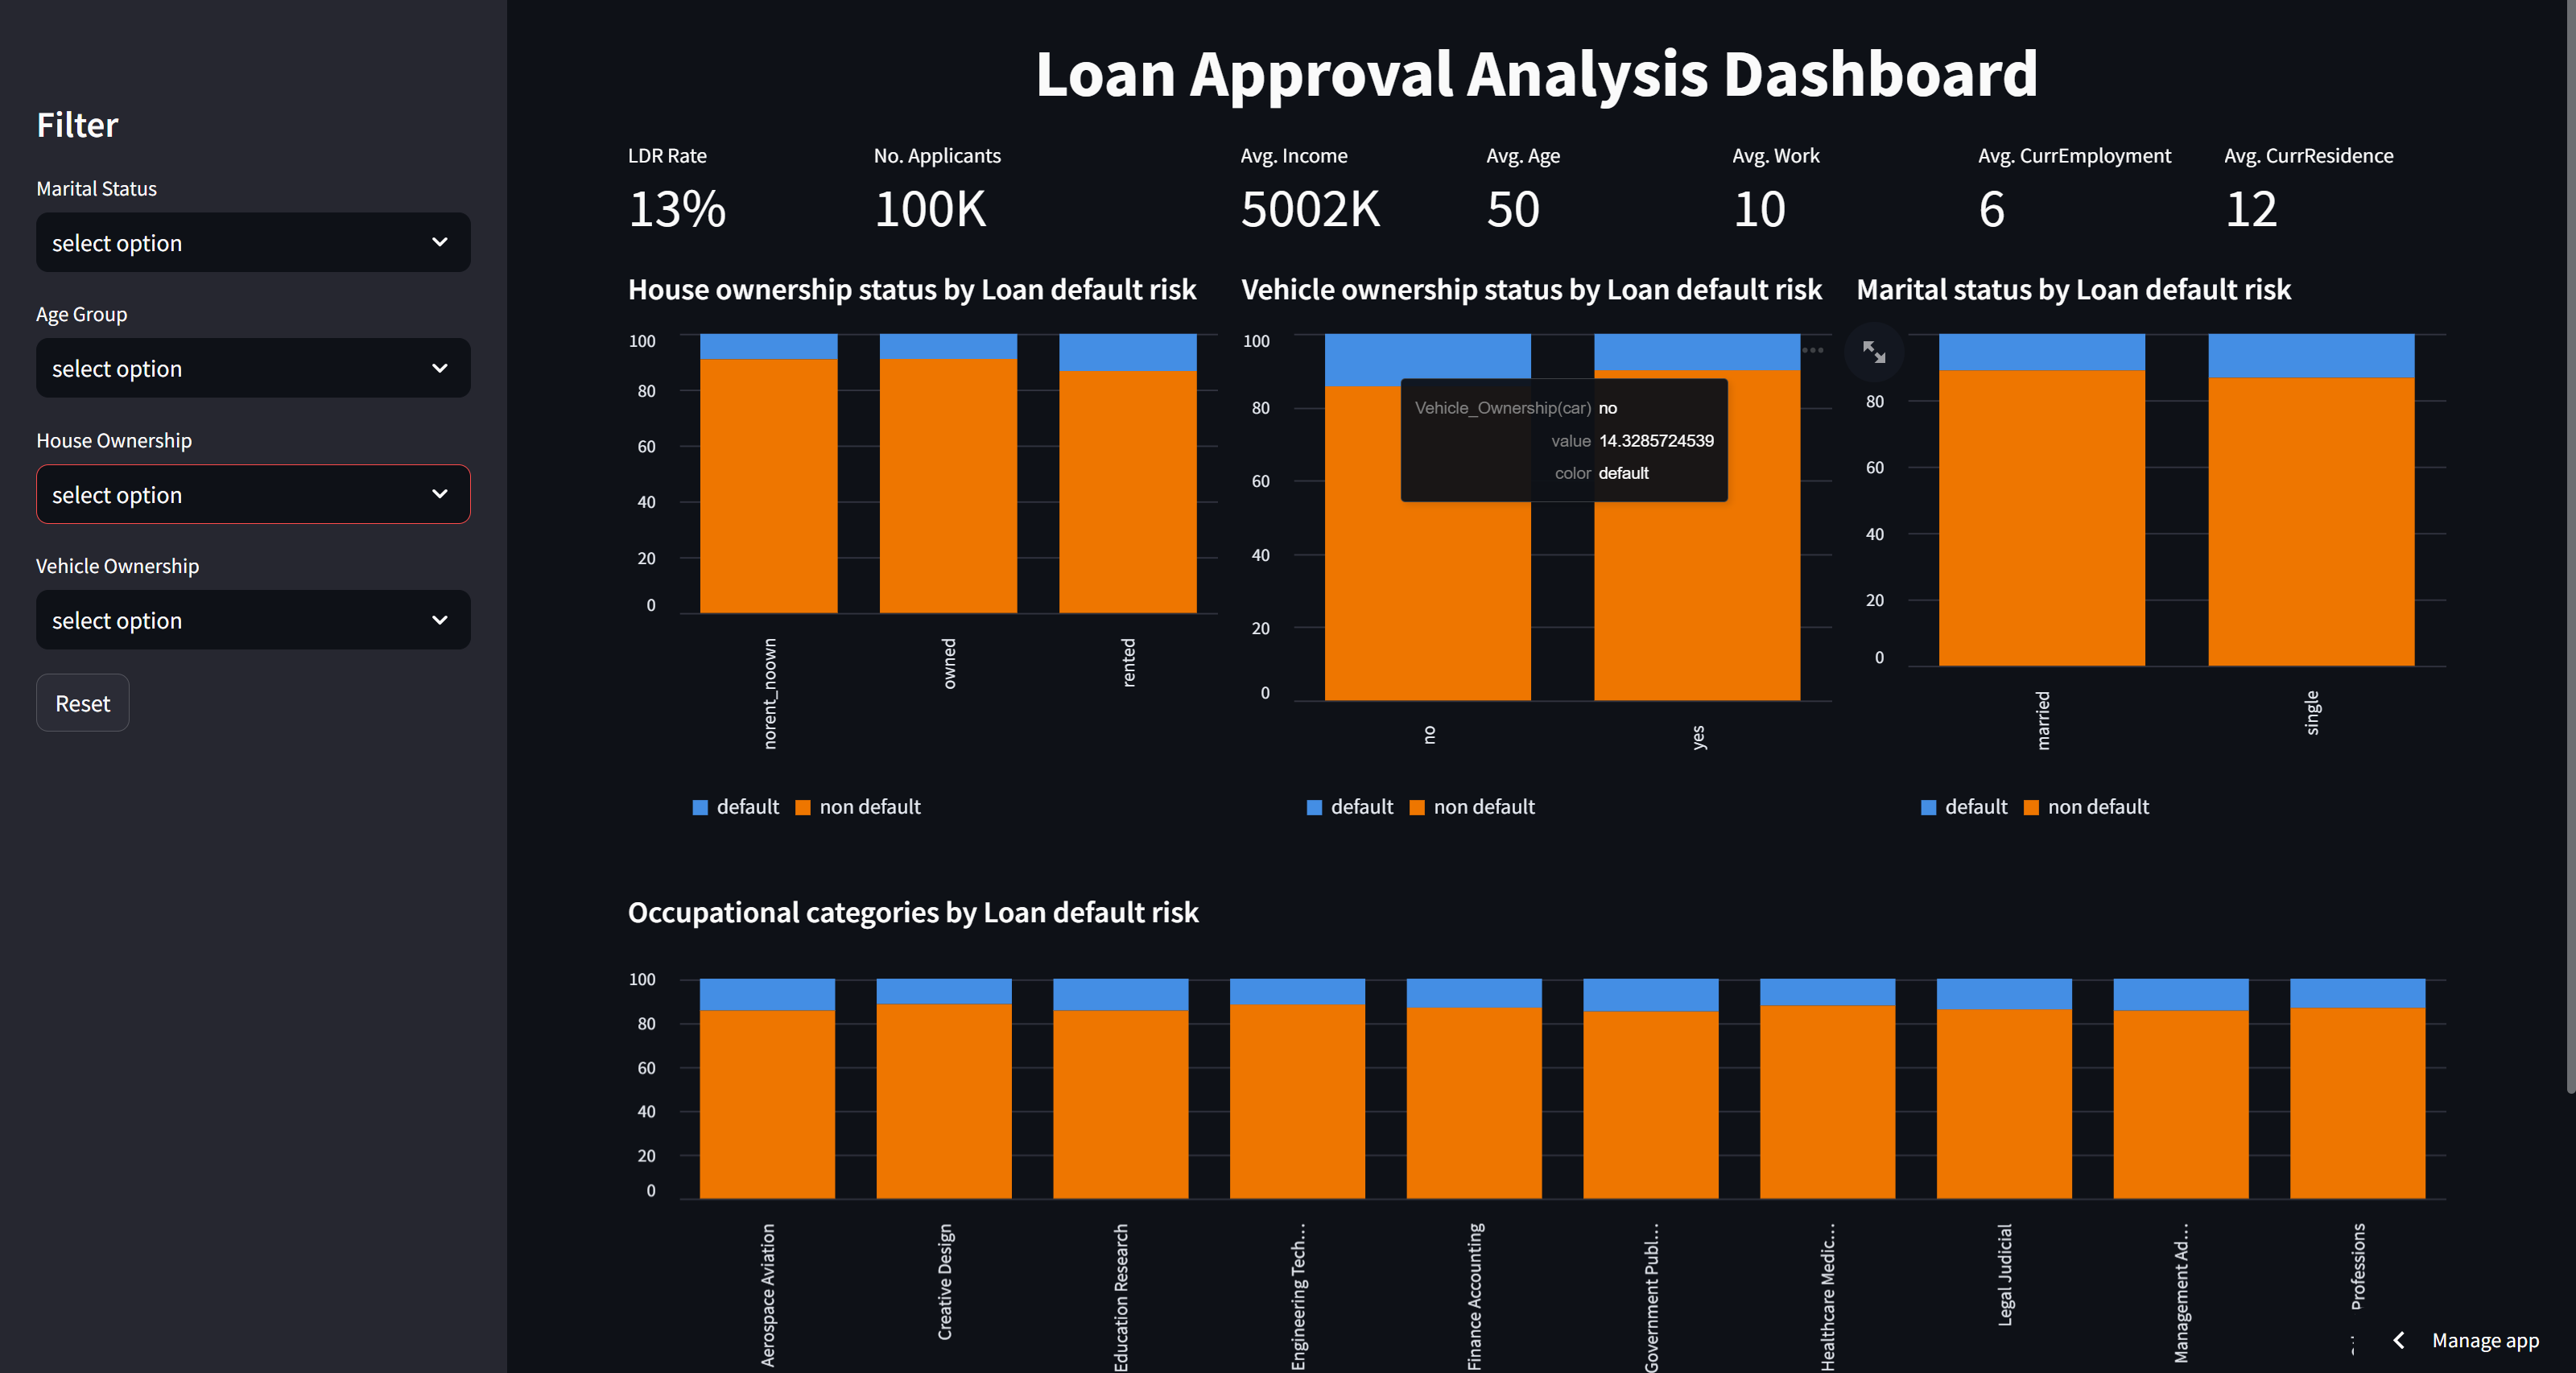

## Challenges
- Occupation had over 50 categories which could have been narrow to either industry or if left open applicant to provide detailed information e.g. applicant mentioning being a technical writer its quite general and hard to categorise.
- Distribution of the numerical variables follow uniform distribution.
- In feature selection most of the variables did not meet the criteria:
    - Weight of evidence and Information Value criteria, with only Vehicle ownership variale being selected.
    - Recursive Feature elimination, with only 5 variables meeting the criteria since they had a p-value<0.05
- Under representation of Loan default risk applicants only 13%, which possed quite a challenge in terms drawing insights.

Observations:
- Data had no outliers for numerical variables
- Had no missing values
- No duplicates for the Applicant's ID variable
- Some of occupation variable responses were general and not specific, which made it difficult in regrouping them base on industry, skill and funcitonaly

# Recommendations

- Center marketing efforts on high socio-economic class individuals with a stable income probably. 
- Consider offering incentives or special loan packages for married individuals.
- Offer more financial education, awareness or counseling for applicants who rent house, to reduce their loan default risk.
- Tailor loan products or terms to accommodate applicants with diverse age groups and work experiences.
- Continuously monitor and analyze loan default data to refine targeting strategies and improve loan approval processes. Inaddition also explore other applicants loan information to better understand and segment applicants. some of these other information may include:
    - Applicant's loan amount size
    - Applicant's employee status interms of employed, self-employed and unemployed
    - Applicant's credit history
    - Applicant's location information either urban, semi-urban or rural etc..